# House Prices

<a href="https://www.kaggle.com/c/house-prices-advanced-regression-techniques">Учебное соревнование Kaggle</a> по предсказанию стоимости домов в Айове

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('data/hprice_train.csv')
test = pd.read_csv('data/hprice_test.csv')

In [3]:
print train.shape
print test.shape

(1460, 81)
(1459, 80)


In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skew is: 1.8828757597682129


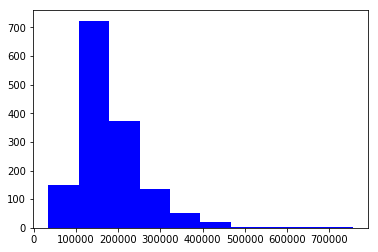

In [6]:
print "Skew is:", train.SalePrice.skew()
plt.hist(train.SalePrice, color='blue')
plt.show()

Skew is: 0.12133506220520406


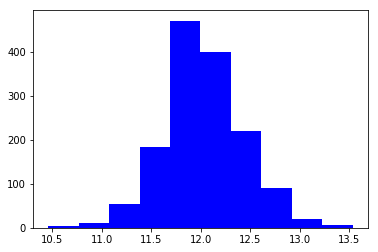

In [7]:
# распределение целевой переменной скошено и отличается от нормального. Преобразуем переменную с помощью логарифма

target = np.log(train.SalePrice)
print "Skew is:", target.skew()
plt.hist(target, color='blue')
plt.show()

### Числовые признаки

In [8]:
numeric_features = train.select_dtypes(include=[np.number]).drop(['Id','SalePrice'],axis=1)

In [9]:
len(numeric_features.columns)

36

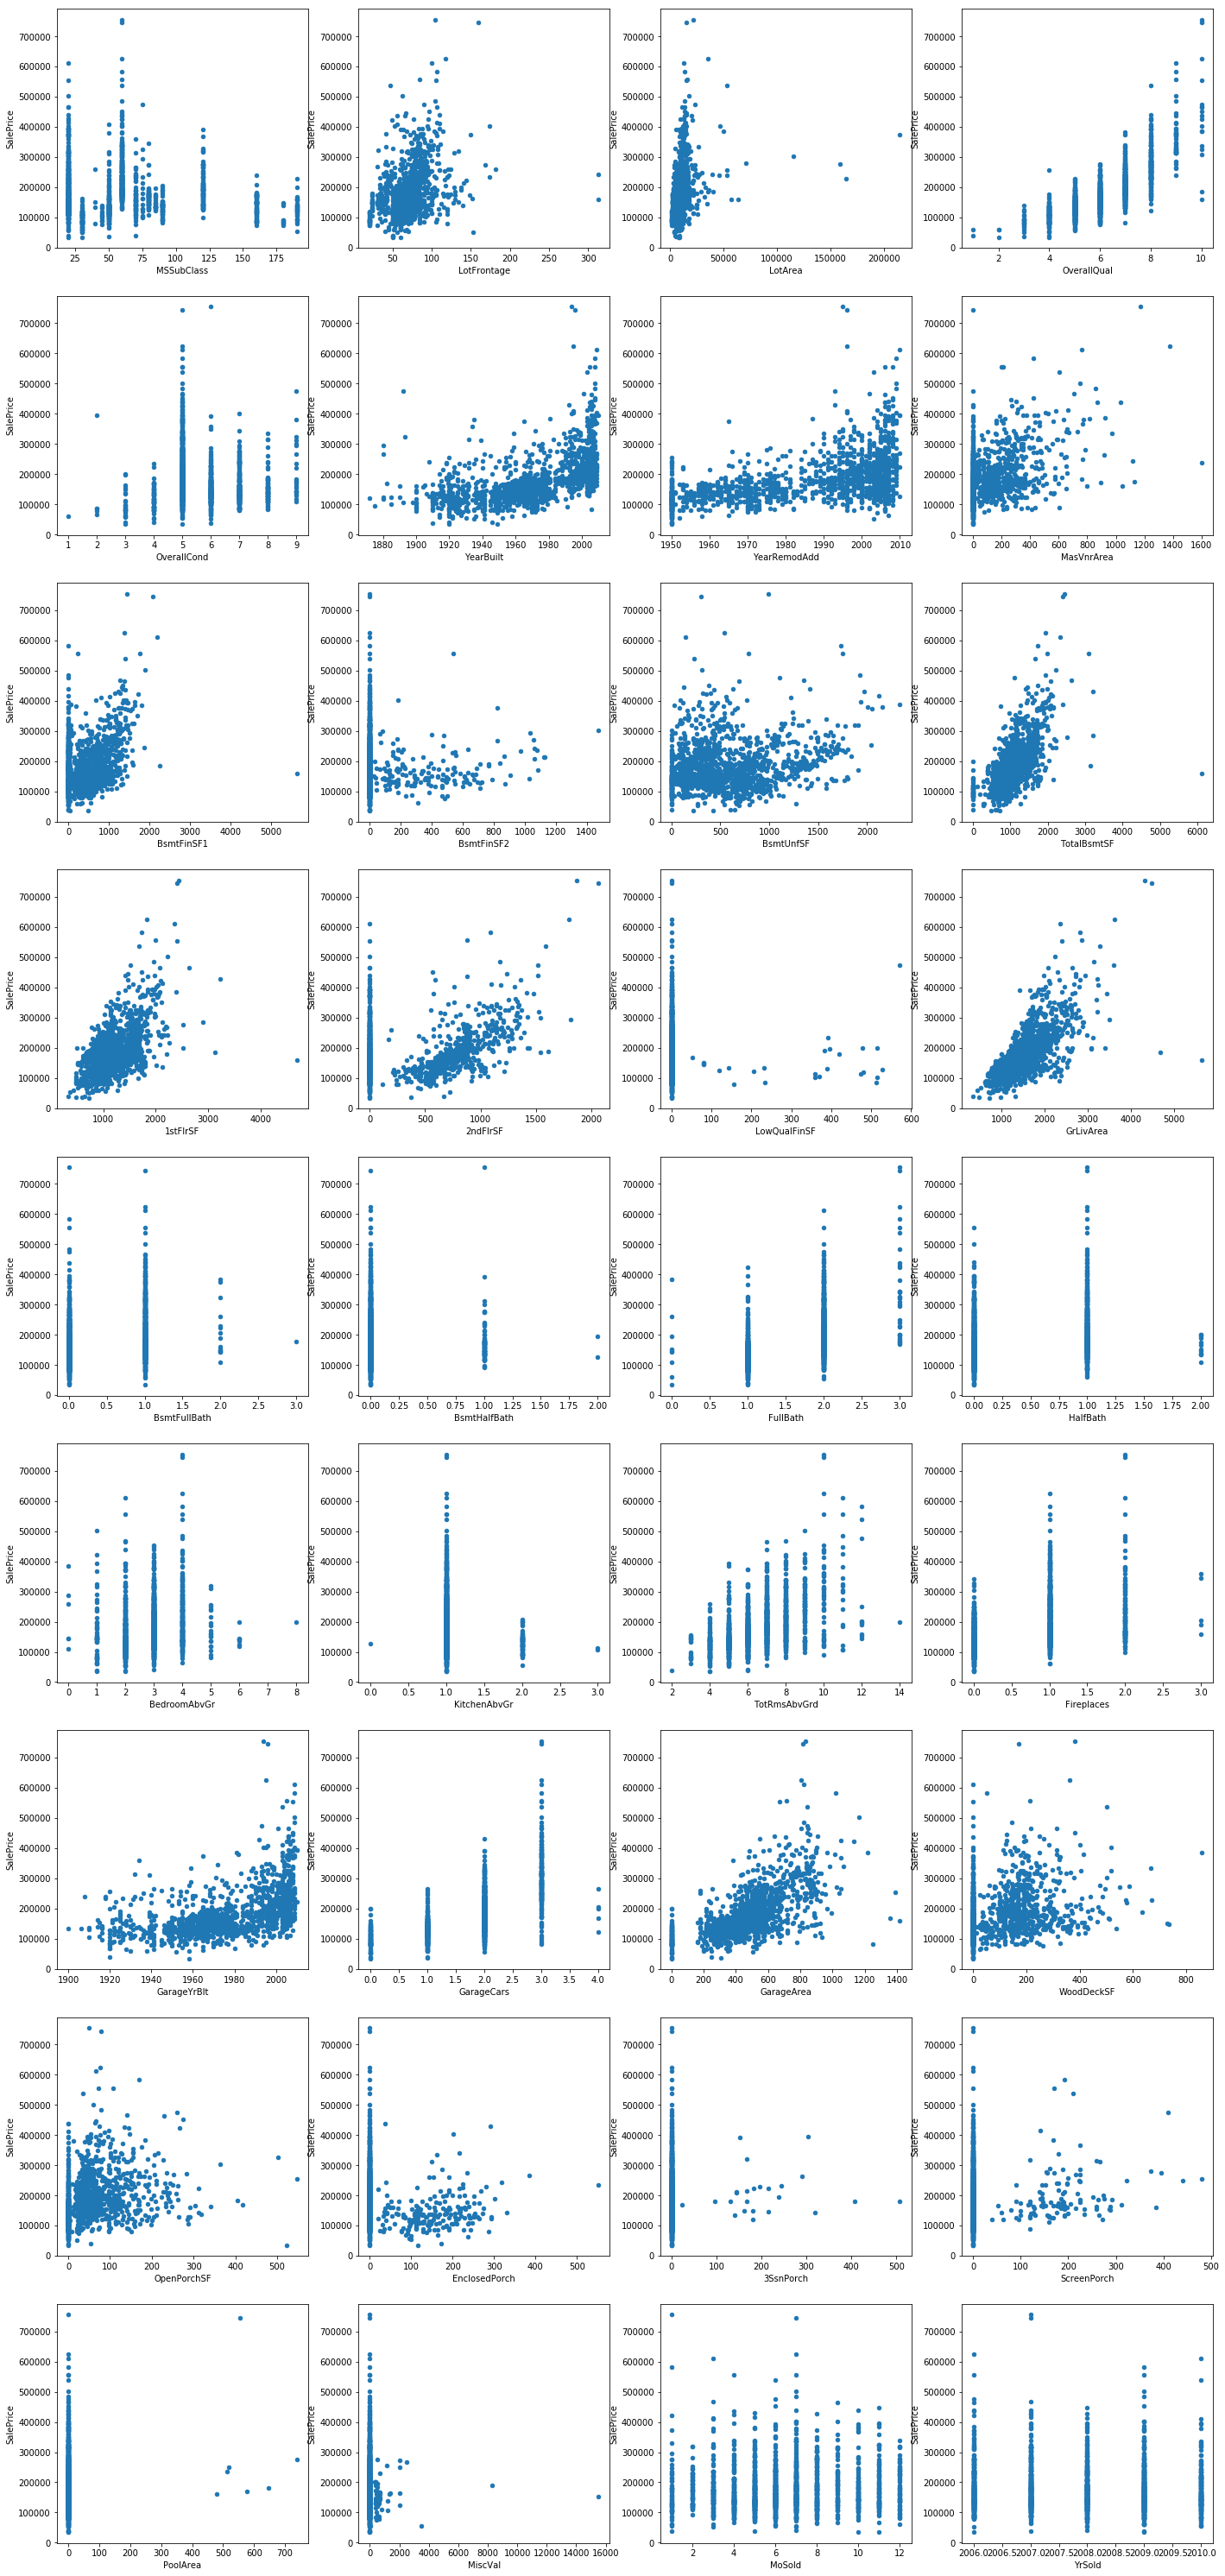

In [10]:
fig, axes = plt.subplots(nrows=9, ncols=4, figsize=(24,54))
for idx, feature in enumerate(numeric_features.columns):
    train.plot(feature, "SalePrice", subplots=True, kind="scatter", ax=axes[idx / 4, idx % 4])
plt.show()

Заполним пропуски

In [11]:
num_nulls = pd.DataFrame(numeric_features.isnull().sum().sort_values(ascending=False)[:10])
num_nulls.columns = ['Null Count']
num_nulls.index.name = 'Feature'
num_nulls

,Null Count
Feature,
LotFrontage,259
GarageYrBlt,81
MasVnrArea,8
YrSold,0
BsmtFinSF2,0
LowQualFinSF,0
2ndFlrSF,0
1stFlrSF,0
TotalBsmtSF,0


In [12]:
train[['LotFrontage','GarageYrBlt','MasVnrArea']].describe()

,LotFrontage,GarageYrBlt,MasVnrArea
count,1201.000000,1379.000000,1452.000000
mean,70.049958,1978.506164,103.685262
std,24.284752,24.689725,181.066207
min,21.000000,1900.000000,0.000000
25%,59.000000,1961.000000,0.000000
50%,69.000000,1980.000000,0.000000
75%,80.000000,2002.000000,166.000000
max,313.000000,2010.000000,1600.000000


In [20]:
pd.DataFrame(test.isnull().sum().sort_values(ascending=False)[:35])

,0
PoolQC,1456
MiscFeature,1408
Alley,1352
Fence,1169
FireplaceQu,730
GarageQual,78
GarageCond,78
GarageFinish,78
GarageType,76
BsmtCond,45


In [17]:
def fill_missing(df):
    df["LotFrontage"] = df["LotFrontage"].fillna(0)
    df["GarageYrBlt"] = df["GarageYrBlt"].fillna(0)
    df["MasVnrArea"] = df["MasVnrArea"].fillna(0)

    return df

In [18]:
numeric_features = fill_missing(numeric_features)

In [19]:
test = fill_missing(test)

Посмотрим на корреляцию числовых признаков

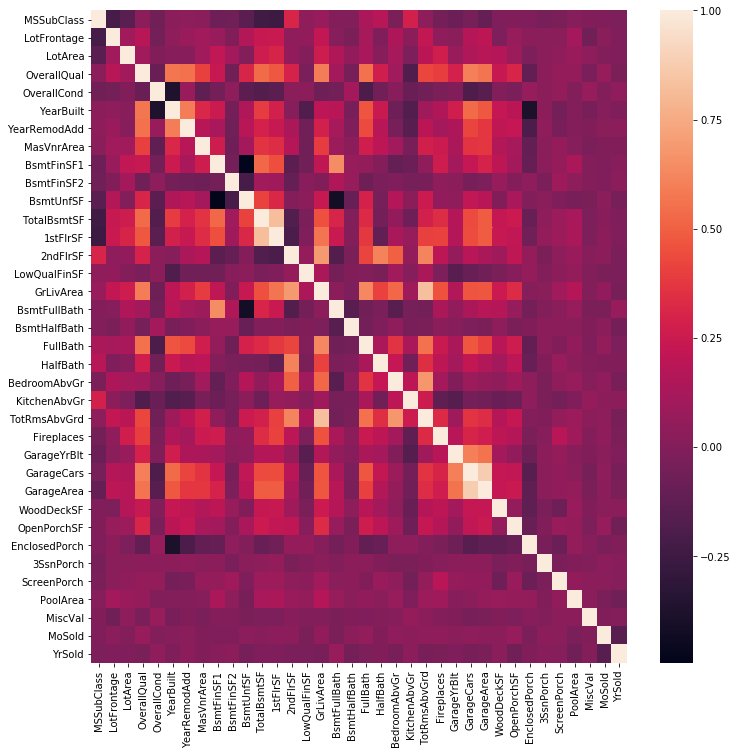

In [21]:
import seaborn as sns
corr_matr = numeric_features.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matr, vmax=1)

In [22]:
numeric_features[['TotalBsmtSF', '1stFlrSF','GrLivArea', 'TotRmsAbvGrd','GarageCars', 'GarageArea']].corr()

,TotalBsmtSF,1stFlrSF,GrLivArea,TotRmsAbvGrd,GarageCars,GarageArea
TotalBsmtSF,1.000000,0.819530,0.454868,0.285573,0.434585,0.486665
1stFlrSF,0.819530,1.000000,0.566024,0.409516,0.439317,0.489782
GrLivArea,0.454868,0.566024,1.000000,0.825489,0.467247,0.468997
TotRmsAbvGrd,0.285573,0.409516,0.825489,1.000000,0.362289,0.337822
GarageCars,0.434585,0.439317,0.467247,0.362289,1.000000,0.882475
GarageArea,0.486665,0.489782,0.468997,0.337822,0.882475,1.000000


In [23]:
numeric_features = numeric_features.drop(['1stFlrSF','GarageCars','GrLivArea'],axis=1)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

y = np.log(train.SalePrice)
X = numeric_features

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=.25)

lr = linear_model.LinearRegression()

model = lr.fit(X_train, y_train)
print "R^2 is: ", model.score(X_test, y_test)

R^2 is:  0.867100444628272


### Категориальные признаки

Попробуем добавить некоторые категориальные признаки в модель

In [25]:
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [26]:
# One Hot Encoding для категориальных признаков

def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

In [27]:
corr = train.corr()

print corr['SalePrice'].sort_values(ascending=False)[:5]

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64


In [28]:
train.OverallQual.value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [29]:
quality_pivot = train.pivot_table(index='OverallQual',
                                  values='SalePrice', aggfunc=np.median)

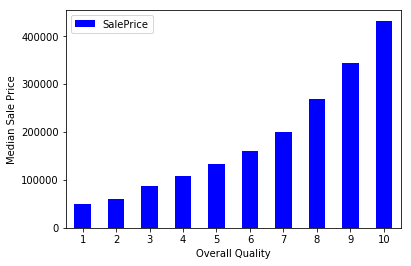

In [30]:
quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

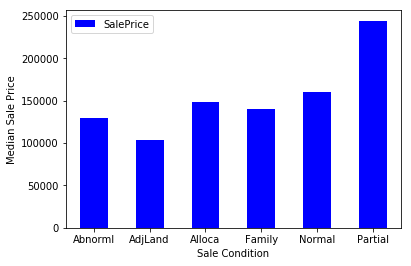

In [31]:
condition_pivot = train.pivot_table(index='SaleCondition',
                                    values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [32]:
def encode(x): return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

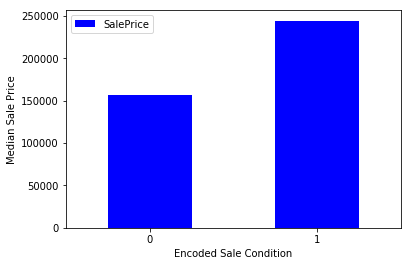

In [34]:
condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [35]:
cat_features = train[["OverallQual", "enc_condition"]]

In [36]:
for c in ["OverallQual", "enc_condition"]:
    cat_features = create_dummies(cat_features, c)
    test = create_dummies(test, c)

In [37]:
cat_features.columns

Index([u'OverallQual', u'enc_condition', u'OverallQual_1', u'OverallQual_2',
       u'OverallQual_3', u'OverallQual_4', u'OverallQual_5', u'OverallQual_6',
       u'OverallQual_7', u'OverallQual_8', u'OverallQual_9', u'OverallQual_10',
       u'enc_condition_0', u'enc_condition_1'],
      dtype='object')

In [38]:
y = np.log(train.SalePrice)
X = pd.concat([numeric_features,cat_features],axis=1)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=1, test_size=.25)

lr = linear_model.LinearRegression()

model = lr.fit(X_train, y_train)
print "R^2 is: \n", model.score(X_test, y_test)

R^2 is: 
0.8617389704464591


In [40]:
predictions = model.predict(X_test)

In [41]:
from sklearn.metrics import mean_squared_error
print 'RMSE is: \n', mean_squared_error(y_test, predictions)

RMSE is: 
0.0231725077439097


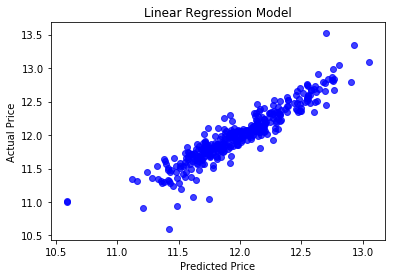

In [42]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

In [43]:
submission = pd.DataFrame()
submission['Id'] = test.Id

In [57]:
feats = test[X.columns]

In [58]:
predictions = model.predict()

In [59]:
final_predictions = np.exp(predictions)

In [60]:
print "Original predictions are: \n", predictions[:5], "\n"
print "Final predictions are: \n", final_predictions[:5]

Original predictions are: 
[11.76056212 11.81418231 12.02395217 12.18049483 12.13307682] 

Final predictions are: 
[128099.44016485 135155.64433686 166700.18423218 194949.30453192
 185920.94193358]


In [61]:
submission['SalePrice'] = final_predictions
submission.head()

,Id,SalePrice
0,1461,128099.440165
1,1462,135155.644337
2,1463,166700.184232
3,1464,194949.304532
4,1465,185920.941934


In [62]:
submission.to_csv('submission1.csv', index=False)